In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

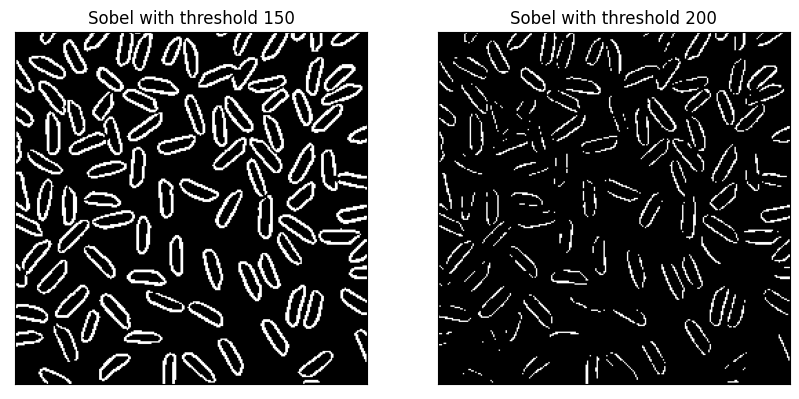

In [8]:
# Import image
img = cv2.imread('images/rice.png', cv2.IMREAD_GRAYSCALE)

# Take gradient and take the magnitude of graidnet
sobel_img_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_img_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel_img = cv2.magnitude(sobel_img_x, sobel_img_y)

# Threshold the image by 150 and 200
ret, sobel_150_img = cv2.threshold(sobel_img, 150, 255, cv2.THRESH_BINARY)
ret, sobel_200_img = cv2.threshold(sobel_img, 200, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(sobel_150_img, cmap = 'gray'), plt.title("Sobel with threshold 150")
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(sobel_200_img, cmap = 'gray'), plt.title("Sobel with threshold 200")
plt.xticks([]), plt.yticks([])
plt.show()

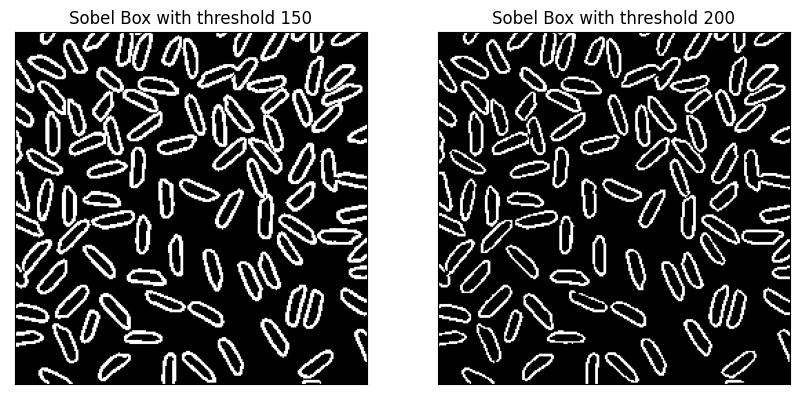

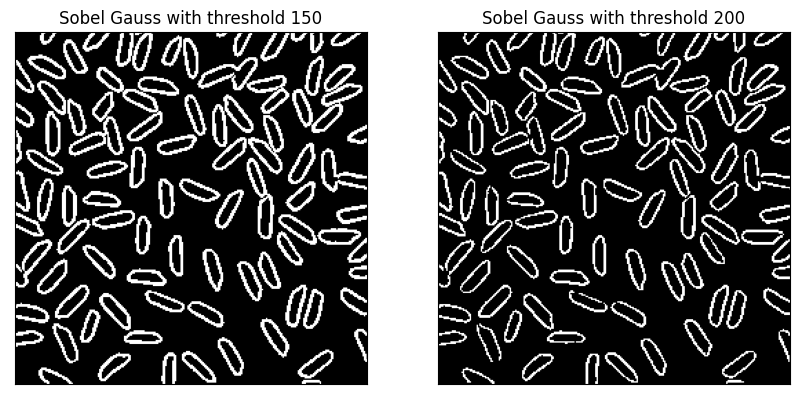

In [9]:
# Import image
img = cv2.imread('images/rice.png', cv2.IMREAD_GRAYSCALE)

# Apply box filter to image
box_filter_img = cv2.boxFilter(img, -1, (5,5))

# Apply Gaussian filter to image
gaussian_filter = cv2.GaussianBlur(img, (5,5), math.sqrt(2))

# Sharpen images using different filters
img_box = np.add(img, np.subtract(img, box_filter_img))
img_gauss = np.add(img, np.subtract(img, gaussian_filter))

# Perform sobel edge detection on Gaussian sharpened image
sobel_img_x = cv2.Sobel(img_gauss, cv2.CV_64F, 1, 0, ksize=3)
sobel_img_y = cv2.Sobel(img_gauss, cv2.CV_64F, 0, 1, ksize=3)
sobel_img_gauss = cv2.magnitude(sobel_img_x, sobel_img_y)

# Perform sobel edge detection on Box filtered image
sobel_img_x = cv2.Sobel(img_box, cv2.CV_32F, 1, 0, ksize=3)
sobel_img_y = cv2.Sobel(img_box, cv2.CV_32F, 0, 1, ksize=3)
sobel_img_box = cv2.magnitude(sobel_img_x, sobel_img_y)

# Threshold the images by 150 and 200
ret, sobel_150_gauss = cv2.threshold(sobel_img_gauss, 150, 255, cv2.THRESH_BINARY)
ret, sobel_200_gauss = cv2.threshold(sobel_img_gauss, 200, 255, cv2.THRESH_BINARY)

ret, sobel_150_box = cv2.threshold(sobel_img_box, 150, 255, cv2.THRESH_BINARY)
ret, sobel_200_box = cv2.threshold(sobel_img_box, 200, 255, cv2.THRESH_BINARY)

plt.figure(figsize = (10,10))
plt.subplot(121), plt.imshow(sobel_150_box, cmap = 'gray'), plt.title("Sobel Box with threshold 150")
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(sobel_200_box, cmap = 'gray'), plt.title("Sobel Box with threshold 200")
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize = (10,10))
plt.subplot(121), plt.imshow(sobel_150_gauss, cmap = 'gray'), plt.title("Sobel Gauss with threshold 150")
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(sobel_200_gauss, cmap = 'gray'), plt.title("Sobel Gauss with threshold 200")
plt.xticks([]), plt.yticks([])
plt.show()

1.3 Sharpening greatly improves the effects of edge detection. This is because sharpening the images causes the intensity at each white pixel to be greater than before since you are adding on details to each pixel. The edges are then much more easily seen since the gradient at these brightened pixels will be much greater than before.

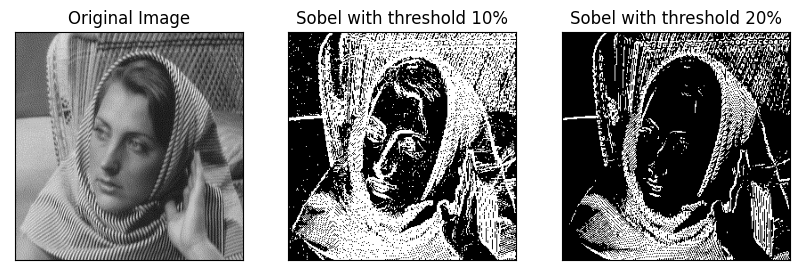

In [10]:
# 2.1 Edge detection on images that have been denoised
img = cv2.imread("images/woman.png", cv2.IMREAD_GRAYSCALE)

# Perform sobel edge detection on image names woman
sobel_img_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_img_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel_img = cv2.magnitude(sobel_img_x, sobel_img_y)

# Take max pixel and threshold the image at 10% and 20% of this max intensity
max_pixel = np.amax(sobel_img)
ret, sobel_10_img = cv2.threshold(sobel_img, 0.1*max_pixel, 255, cv2.THRESH_BINARY)
ret, sobel_20_img = cv2.threshold(sobel_img, 0.2*max_pixel, 255, cv2.THRESH_BINARY)

plt.figure(figsize = (10,10))
plt.subplot(131), plt.imshow(img, cmap = 'gray'), plt.title("Original Image")
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(sobel_10_img, cmap = 'gray'), plt.title("Sobel with threshold 10%")
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(sobel_20_img, cmap = 'gray'), plt.title("Sobel with threshold 20%")
plt.xticks([]), plt.yticks([])
plt.show()

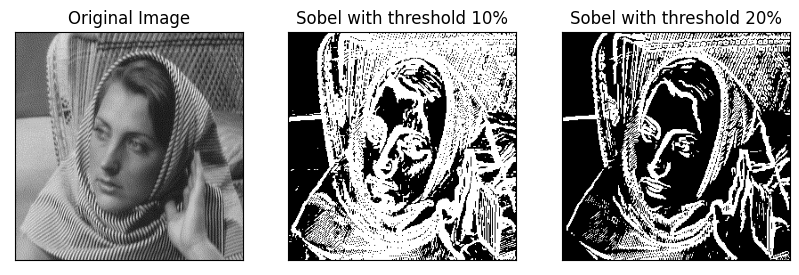

In [11]:
img = cv2.imread("images/woman.png", cv2.IMREAD_GRAYSCALE)

# Apply box filter to image
box_filtered_img = cv2.boxFilter(img, -1, (3,3), normalize = True)

# Apply sobel edge detection to box filtered image
sobel_img_x = cv2.Sobel(box_filtered_img, cv2.CV_64F, 1, 0, ksize=3)
sobel_img_y = cv2.Sobel(box_filtered_img, cv2.CV_64F, 0, 1, ksize=3)
sobel_img = cv2.magnitude(sobel_img_x, sobel_img_y)

# Take max pixel value and threshold image at 10% and 20% of that value
max_pixel = np.amax(sobel_img)
ret, sobel_10_img = cv2.threshold(sobel_img, 0.1*max_pixel, 255, cv2.THRESH_BINARY)
ret, sobel_20_img = cv2.threshold(sobel_img, 0.2*max_pixel, 255, cv2.THRESH_BINARY)

plt.figure(figsize = (10,10))
plt.subplot(131), plt.imshow(img, cmap = 'gray'), plt.title("Original Image")
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(sobel_10_img, cmap = 'gray'), plt.title("Sobel with threshold 10%")
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(sobel_20_img, cmap = 'gray'), plt.title("Sobel with threshold 20%")
plt.xticks([]), plt.yticks([])
plt.show()

2.3 Denoising the image prior to performing sobel edge detection significantly improves the accuracy of the edge detection algorithm. This is because taking derivatives heightens the effect of any noise on the image, so when you apply the edge detection algorithm to the original, more noisy image, it is not as accurate. However if we filter the image beforehand, then we reduce the amount of noise on the image so there taking the gradient of the image will not enhance noisy features.